In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cancer_data.csv")

In [3]:
df.sample(24)
pd.set_option('display.max_columns', None)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['Unnamed: 32', 'id'],axis = 1)

In [6]:
df.sample(15)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
368,M,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.08465,0.1717,0.05054,1.2070,1.0510,7.733,224.10,0.005568,0.011120,0.020960,0.011970,0.01263,0.001803,30.750,26.44,199.50,3143.0,0.13630,0.16280,0.28610,0.18200,0.2510,0.06494
278,B,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.01238,0.1573,0.05520,0.2580,1.1660,1.683,22.22,0.003741,0.005274,0.010650,0.005044,0.01344,0.001126,15.500,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
482,B,13.470,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.05266,0.1779,0.06639,0.1588,0.5733,1.102,12.84,0.004450,0.014520,0.013340,0.008791,0.01698,0.002787,14.830,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326
350,B,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,0.3534,0.6724,2.225,26.03,0.006583,0.006991,0.005949,0.006296,0.02216,0.002668,13.280,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
443,B,10.570,18.32,66.82,340.9,0.08142,0.04462,0.019930,0.01111,0.2372,0.05768,0.1818,2.5420,1.277,13.12,0.010720,0.013310,0.019930,0.011110,0.01717,0.004492,10.940,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
344,B,11.710,15.45,75.03,420.3,0.11500,0.07281,0.040060,0.03250,0.2009,0.06506,0.3446,0.7395,2.355,24.53,0.009536,0.010970,0.016510,0.011210,0.01953,0.003100,13.060,18.16,84.16,516.4,0.14600,0.11150,0.10870,0.07864,0.2765,0.07806
389,M,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.10210,0.1989,0.05884,0.6107,2.8360,5.383,70.10,0.011240,0.040970,0.074690,0.034410,0.02768,0.006240,20.820,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
239,M,17.460,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.08811,0.1809,0.05966,0.5366,0.8561,3.002,49.00,0.004860,0.027850,0.026020,0.013740,0.01226,0.002759,22.510,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
373,M,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.152700,0.08941,0.1571,0.05478,0.6137,0.6575,4.119,77.02,0.006211,0.018950,0.026810,0.012320,0.01276,0.001711,25.370,23.17,166.80,1946.0,0.15620,0.30550,0.41590,0.21120,0.2689,0.07055
461,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.363500,0.16890,0.2061,0.05623,2.5470,1.3060,18.650,542.20,0.007650,0.053740,0.080550,0.025980,0.01697,0.004558,36.040,31.37,251.20,4254.0,0.13570,0.42560,0.68330,0.26250,0.2641,0.07427


In [7]:
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

C:\Users\ashto\AppData\Local\Temp\ipykernel_25800\4177842504.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})


In [8]:
df.sample(15)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,1,14.200,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.032880,0.02821,0.013500,0.016100,0.002744,16.450,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858
38,0,14.990,25.20,95.54,698.8,0.09387,0.05131,0.023980,0.028990,0.1565,0.05504,1.2140,2.1880,8.077,106.00,0.006883,0.010940,0.01818,0.019170,0.007882,0.001754,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
538,1,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.14,0.012660,0.009692,0.00000,0.000000,0.028820,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938
315,1,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.047,12.69,0.004928,0.003012,0.00262,0.003390,0.013930,0.001344,13.340,19.71,84.48,544.2,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174
296,1,10.910,12.35,69.14,363.7,0.08518,0.04721,0.012360,0.013690,0.1449,0.06031,0.1753,1.0270,1.267,11.09,0.003478,0.012210,0.01072,0.009393,0.029410,0.003428,11.370,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
155,1,12.250,17.94,78.27,460.3,0.08654,0.06679,0.038850,0.023310,0.1970,0.06228,0.2200,0.9823,1.484,16.51,0.005518,0.015620,0.01994,0.007924,0.017990,0.002484,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
399,1,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,0.3438,1.1400,2.225,25.06,0.005463,0.019640,0.02079,0.005398,0.014770,0.003071,13.450,24.49,86.00,562.0,0.12440,0.17260,0.14490,0.05356,0.2779,0.08121
243,1,13.750,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.023440,0.1773,0.05429,0.4347,1.0570,2.829,39.93,0.004351,0.026670,0.03371,0.010070,0.025980,0.003087,15.010,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321
189,1,12.300,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.016540,0.1667,0.05474,0.2382,0.8355,1.687,18.32,0.005996,0.022120,0.02117,0.006433,0.020250,0.001725,13.350,19.59,86.65,546.7,0.10960,0.16500,0.14230,0.04815,0.2482,0.06306
82,0,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.056930,0.05730,0.020300,0.010650,0.005893,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510


In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.shape

(569, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [14]:
X = df.drop(columns = 'diagnosis', axis = 1)
Y = df['diagnosis']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [30]:
#standardise the data
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [33]:
X_train_std

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

Building Neural Network

In [16]:
!pip install tensorflow

In [17]:
import tensorflow as tf

In [18]:
tf.random.set_seed(3)
from tensorflow import keras

In [34]:
#setting layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20,activation ='relu'),
    keras.layers.Dense(2,activation ='sigmoid')
     
])

C:\Users\ashto\Downloads\Resumes\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
#compiling the NN
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
#training NN
history=model.fit(X_train_std,Y_train, validation_split =0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7937 - loss: 0.4739 - val_accuracy: 0.9565 - val_loss: 0.3276
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9412 - loss: 0.3345 - val_accuracy: 0.9783 - val_loss: 0.2326
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9480 - loss: 0.2527 - val_accuracy: 0.9783 - val_loss: 0.1796
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9601 - loss: 0.2045 - val_accuracy: 0.9783 - val_loss: 0.1495
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9601 - loss: 0.1739 - val_accuracy: 0.9783 - val_loss: 0.1311
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9623 - loss: 0.1530 - val_accuracy: 0.9783 - val_loss: 0.1191
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.1373 - val_accuracy: 0.9783 - val_loss: 0.1111
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9640 - loss: 0.1250 - val_accuracy: 0.9783 - val_loss

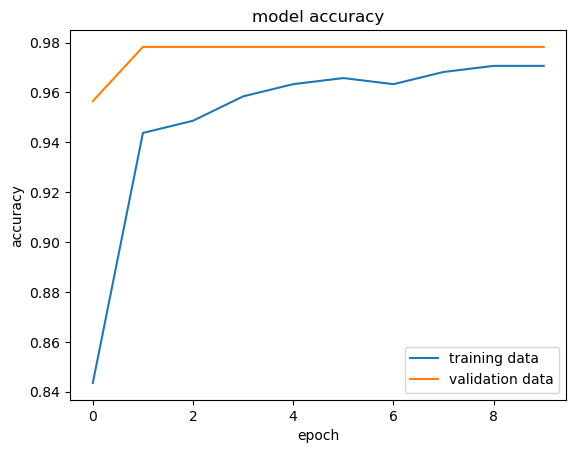

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc = 'lower right')

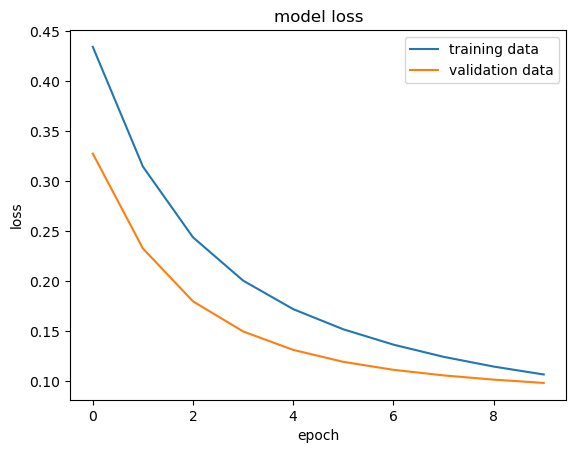

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc = 'upper right')

In [42]:
#accuracy of model on test data

loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.1062 
0.9824561476707458


In [44]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [45]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [46]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.20017351 0.71633637]


In [47]:
print(Y_pred)

[[2.00173512e-01 7.16336370e-01]
 [4.43858773e-01 5.33633351e-01]
 [9.27658379e-02 9.60987747e-01]
 [9.54579771e-01 5.47811169e-07]
 [4.00958717e-01 5.16598046e-01]
 [9.16170537e-01 1.23637568e-04]
 [3.19788575e-01 6.45844936e-01]
 [1.18971385e-01 9.49447453e-01]
 [2.23215371e-01 8.76038611e-01]
 [1.92220405e-01 8.48330796e-01]
 [5.82131863e-01 4.52726394e-01]
 [2.07554996e-01 8.76827240e-01]
 [2.60671884e-01 8.20296288e-01]
 [3.62904638e-01 7.80324936e-01]
 [1.99900925e-01 8.99660408e-01]
 [3.95006508e-01 3.32984887e-02]
 [9.38772708e-02 9.45209861e-01]
 [1.49369016e-01 8.02619755e-01]
 [1.52393550e-01 8.77390981e-01]
 [9.07872438e-01 7.00545846e-04]
 [5.83253801e-03 9.42794830e-02]
 [6.75565004e-02 9.11342919e-01]
 [1.73837528e-01 8.97235096e-01]
 [1.35673106e-01 9.22280490e-01]
 [3.03447843e-01 7.45543838e-01]
 [8.40114594e-01 4.40847175e-03]
 [1.93257570e-01 8.30901742e-01]
 [2.54108101e-01 7.66640067e-01]
 [7.34822035e-01 6.20349916e-03]
 [8.06659877e-01 4.79094544e-03]
 [1.789297

model.predict() gives prediction probability 

In [49]:
#converting prediction probability into labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


Building the predictive system

In [53]:
input_data = (20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)
#change input_data to np array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]) ==0:
    print("The tumor is Malignant")
else:
    print("The tumor is Benign")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.73482203 0.0062035 ]]
[0]
The tumor is Malignant


C:\Users\ashto\Downloads\Resumes\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
